In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [31]:
df = pd.read_csv('final2.csv')
df.head()

,count,Date,Close Price_y,pct_change,log_ret_y,edge_count,node_count,degree,log
0,59,8/31/15 0:00,1.25,0.0,0.0,48,95,1.010526,0
1,389,8/31/15 1:00,1.25,0.0,0.0,59,113,1.044248,0
2,106,8/31/15 2:00,1.25,0.0,0.0,57,113,1.008850,0
3,404,8/31/15 3:00,1.25,0.0,0.0,380,669,1.136024,0
4,238,8/31/15 4:00,1.25,0.0,0.0,194,359,1.080780,0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [34]:
X = df[['count', 'Close Price_y', 'pct_change','edge_count', 'node_count','degree']]
y = df['log']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       266
          1       0.47      1.00      0.64      1985
          2       0.33      0.00      0.00      1986

avg / total       0.38      0.47      0.30      4237



Text(0,0.5,'Predicted Y')

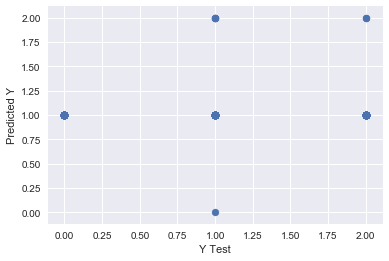

In [39]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.532216190701
MSE: 0.532216190701
RMSE: 0.729531487121


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [42]:
scaled_features.size

127104

In [43]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5
0,-0.627275,-0.546537,-0.030578,-0.606172,-0.603474,-2.281141
1,-0.596869,-0.546537,-0.030578,-0.604908,-0.602358,-1.368567
2,-0.622945,-0.546537,-0.030578,-0.605138,-0.602358,-2.326517
3,-0.595487,-0.546537,-0.030578,-0.568007,-0.567891,1.115087
4,-0.610782,-0.546537,-0.030578,-0.589389,-0.587108,-0.379930


In [44]:
logmodel = LinearRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.436024076377
MSE: 0.280331391793
RMSE: 0.529463305426


Text(0,0.5,'Predicted Y')

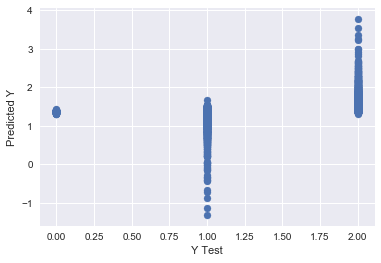

In [46]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

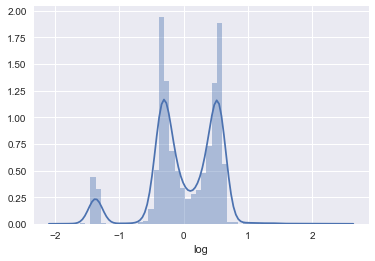

In [47]:
sns.distplot((y_test-predictions),bins=50);

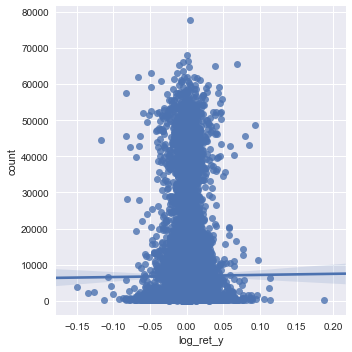

In [48]:
sns.lmplot(x='log_ret_y',y='count',data=df)

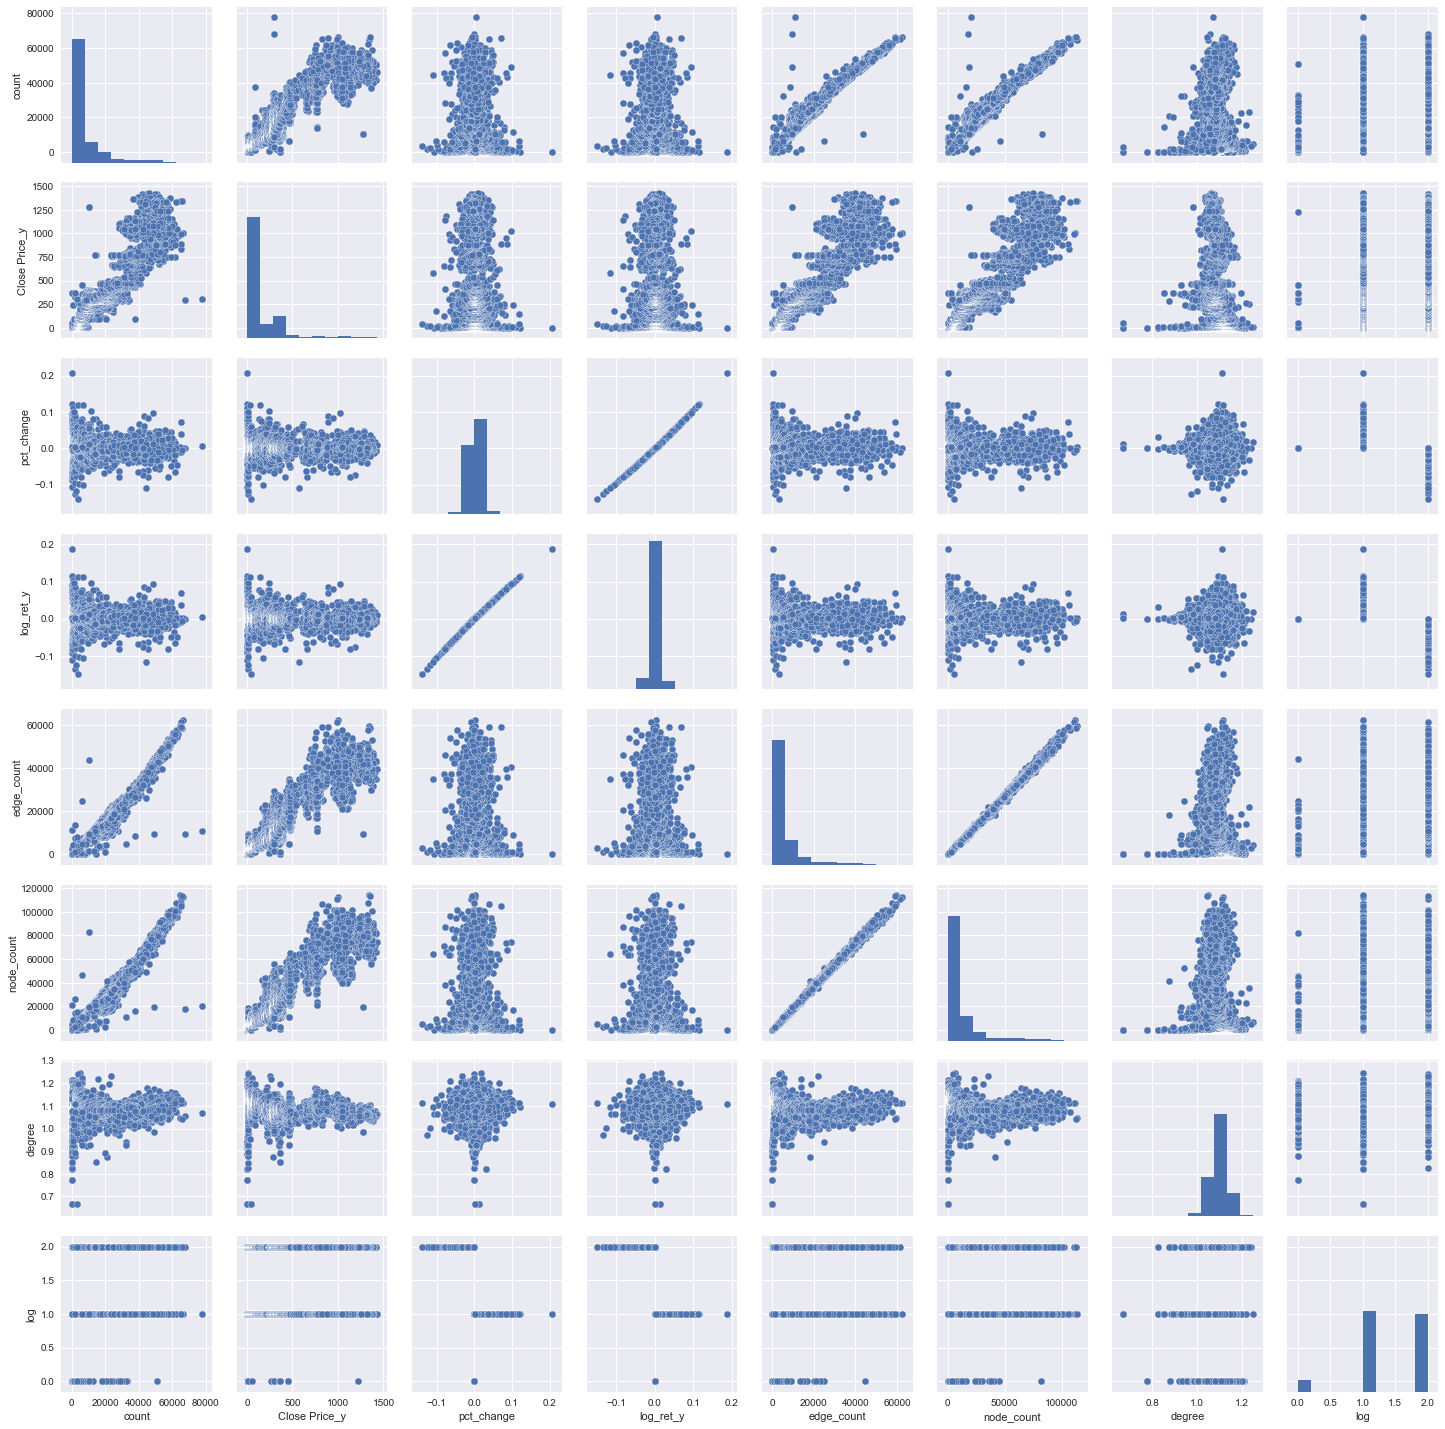

In [49]:
sns.pairplot(df)